<a href="https://colab.research.google.com/github/tdbartolo/tdbartolo-rep/blob/main/machine-learning/ML_heart-attack_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning - MVP
### Aluna: Tamara Di Bartolo

###### **Definição do Problema**: Análise Exploratória dos dados do Dataset Heart Attack Analysis & Prediction visando prever se uma pessoa é propensa ou não a um ataque cardiáco. DataSet:https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset. O dataset escolhido possui informações de idade, sexo, angina induzida por exercício, número de vasos cardíacos, tipo de dor toráxica, pressão arterial em repouso,colesterol, glicose, resultado de eletrocardiograma e frequência cardíaca máxima.Com base nestas informações este trabalho visa determinar se a pessoa é um não propensa a ter uma ataque cardíaco.



In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos

## Carga do Dataset
###### Realização da importação do DataSet obtido no Kaggle e carregado no Github. Não foi necessária a realização de pré-processamento dos dados.

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/tdbartolo/tdbartolo-rep/main/heart.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Preparação dos Dados
######Separação dos dados em conjunto de treino e conjunto de teste com holdout. Realizada a seleção de atributos com **SelectKBest**, a **validação cruzada** com 10 partições e  a alteração do percentual da base de teste de 20% para 10% para tratar a presença de ovefitting observada na menor acurácia do conjunto de teste do que a observada no conjuno de treino.

In [ ]:
test_size = 0.10 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:13]
y = array[:,13]


# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=7)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:13])

# Exibe as pontuações de cada atributos e os 7 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:13]))



X_train, X_test, y_train, y_test = train_test_split(features, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação



Número original de atributos: 13

Número reduzido de atributos: 7

Atributos Originais: Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

Scores dos Atributos Originais: [16.117 25.792 69.772  6.458  2.203  0.237  5.777 65.12  70.952 68.551
 40.902 54.56  40.408]

Atributos Selecionados: ['cp' 'thalachh' 'exng' 'oldpeak' 'slp' 'caa' 'thall']


## Modelagem e Inferência
######Foram selecionados modelos de classificação para construir um modelo de aprendizagem supervisionada capaz de classificar os dados futuros em duas classes: propensão ou não a ter um ataque cardíaco. Algorítmos selecionados: Regressão Logística, KNN, Árvore de decisão, Naive Bayes e SVM e os algoritmos de ensemble Bagging, Random Forest, Extra Trees, AdaBoost, Gradient Boosting e Voting.



### Criação e avaliação de modelos: linha base

LR: 0.849206 (0.069280)
KNN: 0.720503 (0.087885)
CART: 0.760317 (0.093566)
NB: 0.820106 (0.082377)
SVM: 0.691667 (0.109519)
Bagging: 0.808466 (0.057757)
RF: 0.790212 (0.072682)
ET: 0.782804 (0.069737)
Ada: 0.775397 (0.090096)
GB: 0.823280 (0.057485)
Voting: 0.830820 (0.086440)


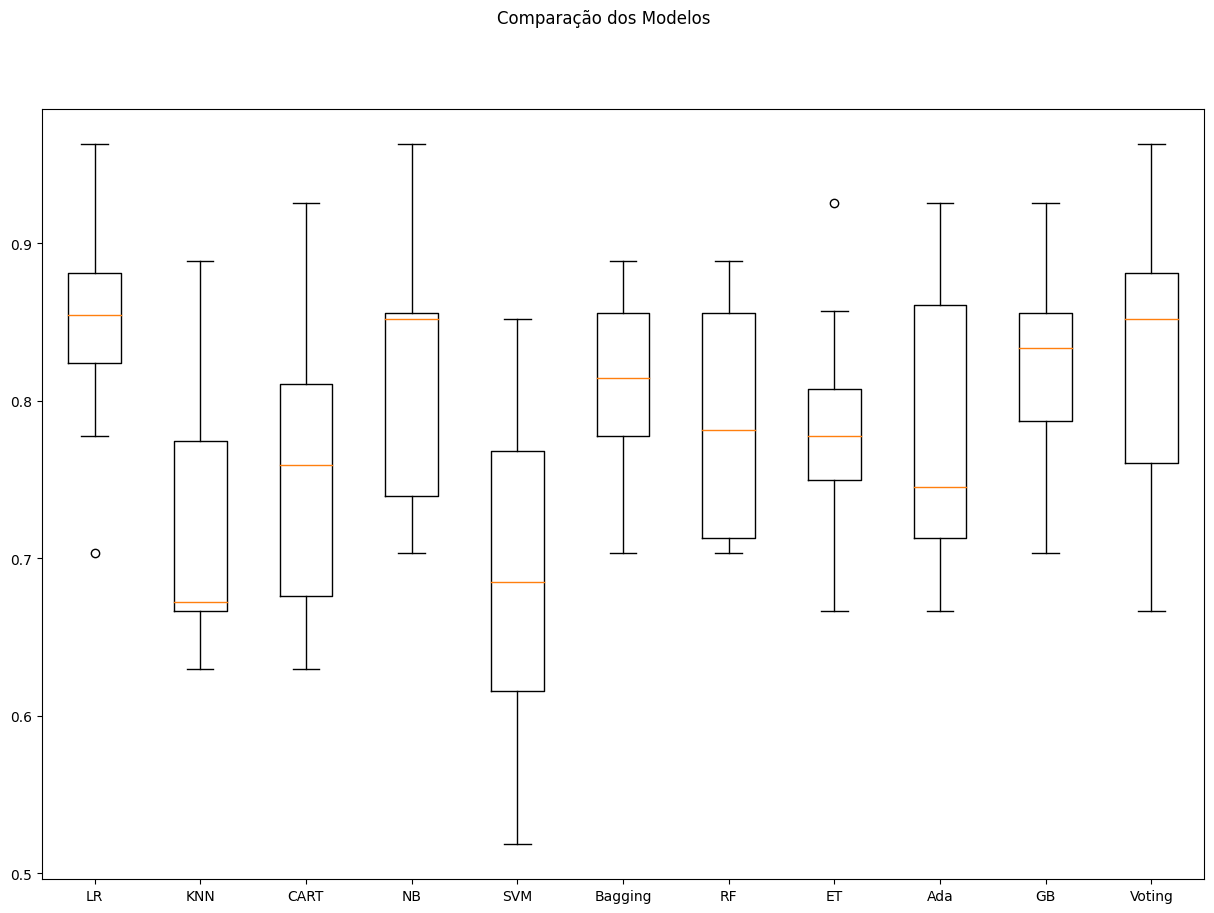

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados
######Foram criados pipelines que incluem etapas de pré-processamento, como padronização (standard scaler) e normalização (min-max scaler), seguidas pelo classificador. Esses pipelines permitem avaliar o desempenho dos modelos usando diferentes pré-processamentos.

LR-orig: 0.849 (0.069)
KNN-orig: 0.721 (0.088)
CART-orig: 0.760 (0.094)
NB-orig: 0.820 (0.082)
SVM-orig: 0.692 (0.110)
Bag-orig: 0.808 (0.058)
RF-orig: 0.790 (0.073)
ET-orig: 0.783 (0.070)
Ada-orig: 0.775 (0.090)
GB-orig: 0.823 (0.057)
Vot-orig: 0.831 (0.086)
LR-padr: 0.849 (0.069)
KNN-padr: 0.823 (0.055)
CART-padr: 0.772 (0.086)
NB-padr: 0.820 (0.082)
SVM-padr: 0.838 (0.065)
Bag-padr: 0.805 (0.075)
RF-padr: 0.805 (0.064)
ET-padr: 0.794 (0.084)
Ada-padr: 0.775 (0.090)
GB-padr: 0.823 (0.057)
Vot-padr: 0.846 (0.070)
LR-norm: 0.820 (0.078)
KNN-norm: 0.809 (0.064)
CART-norm: 0.764 (0.084)
NB-norm: 0.820 (0.082)
SVM-norm: 0.820 (0.063)
Bag-norm: 0.797 (0.068)
RF-norm: 0.794 (0.083)
ET-norm: 0.787 (0.079)
Ada-norm: 0.775 (0.090)
GB-norm: 0.823 (0.057)
Vot-norm: 0.827 (0.072)


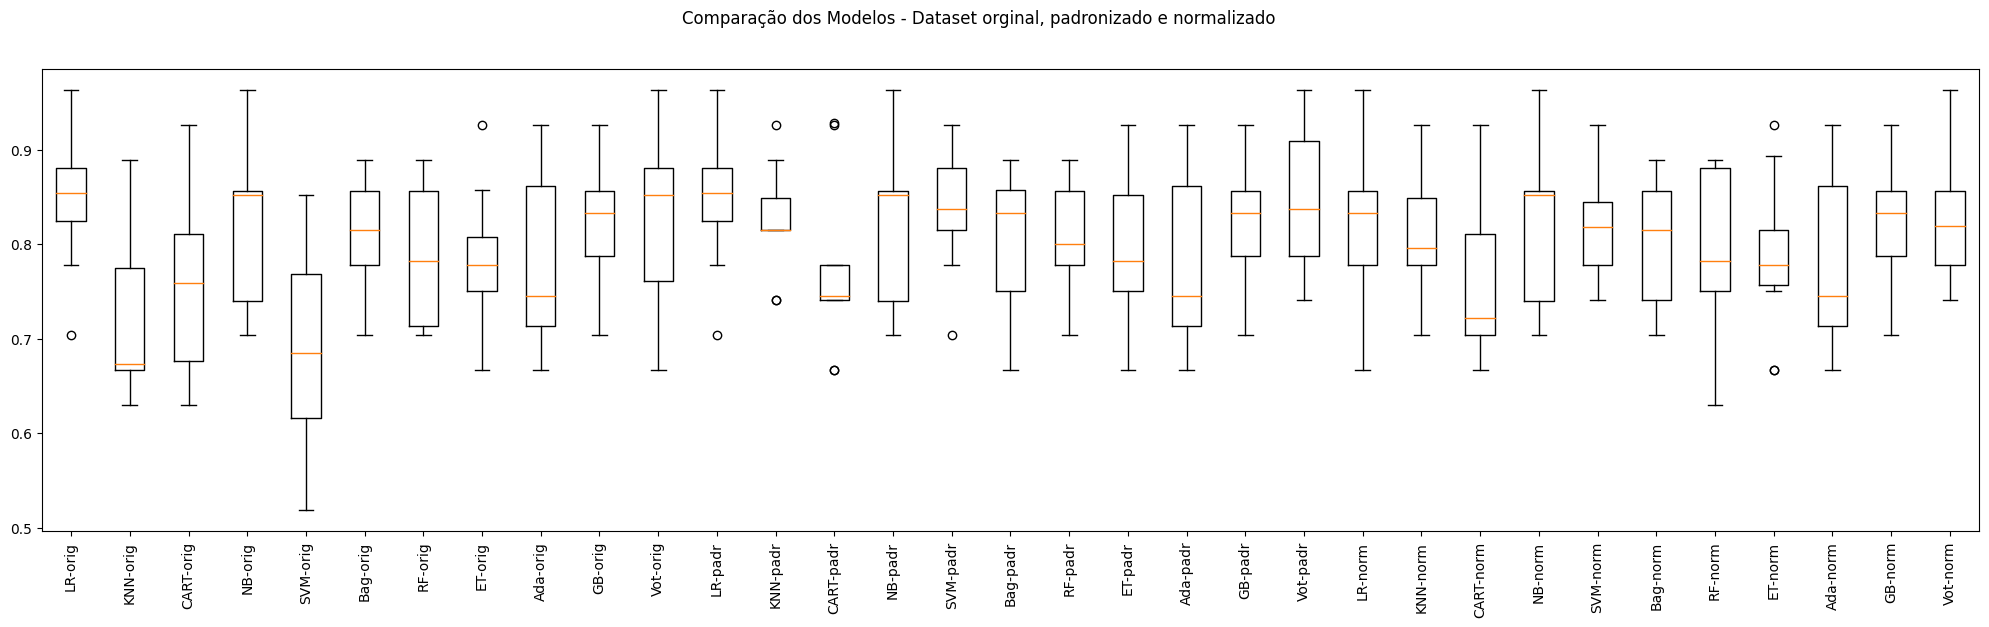

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

Não foi observado underfitting. Mas em versão anterior, foi observado overfitting que foi solucionado através da seleção de atributos e modificação do percentual de houldout conforme mencionado na preparação de dados. Foi realizada a busca pelos melhores hiperparâmetros do modelo de Regressão Logística, que apresentou melhor acurácia após aplicação da normalização e padronização no pipeline. Depois foi utilizado o grid_search.fit(X_train, y_train), para acessar os melhores parâmetros e melhorar a performance do modelo.


In [ ]:
# Tuning do LR

np.random.seed(7) # definindo uma semente global para este bloco

# Defina os hiperparâmetros que deseja otimizar e seus possíveis valores
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.1, 1.0, 10.0],    # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Solver algorithm
}

# Crie uma instância do modelo LogisticRegression
model = LogisticRegression(max_iter=200)

# Crie uma instância do GridSearchCV e especifique o modelo, os parâmetros a serem otimizados e a métrica de avaliação
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

# Ajuste o GridSearchCV com os dados de treinamento
grid_search.fit(X_train, y_train)

# Imprima os melhores parâmetros encontrados
print("Melhores parâmetros: ", grid_search.best_params_)

# Imprima a melhor pontuação obtida durante a otimização
print("Melhor pontuação: ", grid_search.best_score_)

 # imprime a melhor configuração
print("Sem tratamento de missings: LR - Melhor: %f usando %s" % (grid_search.best_score_, grid_search.best_params_))


Melhores parâmetros:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor pontuação:  0.8492063492063492
Sem tratamento de missings: LR - Melhor: 0.849206 usando {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


## Finalização do Modelo

###### A métrica utilizada para avaliar o modelo foi a acurácia, por ser adequada a este modelo de classificação em duas classes. O modelo de Regressão Logística, que apresentou melhor acurácia, foi alimentado com os melhores parâmetros  e treinado usando o método fit com os dados de treinamento (X_train e y_train). Por fim, as previsões foram feitas no conjunto de teste usando o método predict, e a acurácia do modelo aparece como um indicativo de boa performance nos dados de teste.


In [ ]:
## Crie uma instância do modelo LogisticRegression com os melhores hiperparâmetros selecionados
best_params = grid_search.best_params_
model = LogisticRegression(max_iter=200, **best_params)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer predições no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo: ", accuracy)


Acurácia do modelo:  0.8387096774193549
